# 特征工程

In [1]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format',lambda x : '%.2f' % x)
plt.rcParams['axes.unicode_minus'] = False
from warnings import filterwarnings
filterwarnings('ignore')

# 扫描样本

In [2]:
df1 = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')
df1.rename(columns={'Index':"Level"},inplace=True)
df1.sort_values('Height',ascending=True,inplace=True)
df1.reset_index(inplace=True)
plt.style.use({'figure.figsize':(8, 6)})
df1['Ratio'] = df1['Weight']/df1['Height']
df1.sort_values('Ratio',ascending=True,inplace=True)
df1.reset_index(drop=True,inplace=True)
del df1['index']
df1.tail(5)

,Gender,Height,Weight,Level,Ratio
495,Male,148,155,5,1.05
496,Female,146,157,5,1.08
497,Male,140,152,5,1.09
498,Male,145,160,5,1.10
499,Female,142,159,5,1.12


# 标准化+组合特征

In [3]:
Height_scaled = (df1['Height']-df1['Height'].mean())/(df1['Height'].std())  
Weight_scaled = (df1['Weight']-df1['Weight'].mean())/(df1['Weight'].std())  
df2 = pd.DataFrame()
df2['Gender'] = df1['Gender']
df2['Height_scaled'] = Height_scaled
df2['Weight_scaled'] = Weight_scaled
df2['Height'] = df1['Height']
df2['Weight'] = df1['Weight']
df2['Ratio'] = Weight_scaled/Height_scaled
df2['Multi'] = Weight_scaled*Height_scaled
df2['Level'] = df1['Level']

df2.sort_values('Ratio',ascending=True,inplace=True)
df2 = df2.reset_index(drop=True)
df2.tail(5)

,Gender,Height_scaled,Weight_scaled,Height,Weight,Ratio,Multi,Level
495,Female,0.06,1.42,171,152,22.03,0.09,5
496,Female,0.06,1.51,171,155,23.46,0.10,5
497,Female,-0.06,-1.61,169,54,27.86,0.09,2
498,Male,0.00,0.28,170,115,81.27,0.00,4
499,Female,0.00,1.54,170,156,451.50,0.01,5


# 显示相关性

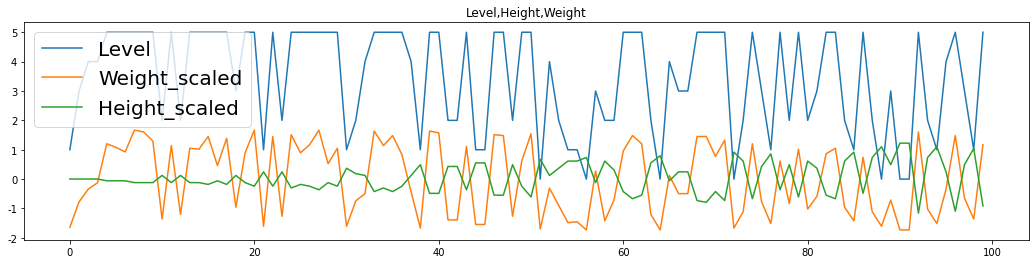

In [4]:
def show_data(x,y,label):
    li, = plt.plot(x, y,label=label)
    return li

x = df2[:100].index
y1 = df2[:100]['Level']
y2 = df2[:100]['Weight_scaled']
y3 = df2[:100]['Height_scaled']

plt.figure(figsize=(18,4))

line1 = show_data(x,y1,"Level")
line2 = show_data(x,y2,"Weight_scaled")
line3 = show_data(x,y3,"Height_scaled")


plt.legend(handles=[line1,line2,line3],fontsize=20)

plt.xlabel('')
plt.ylabel('')
plt.title('Level,Height,Weight')

plt.show()

# 相关系数

In [5]:
df3 = df1[:]
del df3['Ratio']
df3.corr()

,Height,Weight,Level
Height,1.00,0.00,-0.42
Weight,0.00,1.00,0.80
Level,-0.42,0.80,1.00


# 方差法

In [6]:
df3.var()

Height    268.15
Weight   1048.63
Level       1.84
dtype: float64

# 卡方检验

P值：p-value就是用来判断H0假设是否成立的依据。若p值小于0.05，则可以推翻H0(两者没有关系)

置信度：比如p=0.01就是有99%的可信度接受他们有相关性

(P值表示这种情况发生的概率大小,如果小于0.05或者小于0.01,表明这种情况发生的概率很低)

In [7]:
from scipy import stats
obs = [102, 102, 96, 105, 95, 100]
exp = [100, 100, 100, 100, 100, 100]
chi = stats.chisquare(obs, f_exp = exp)
print("%.6f"%chi.pvalue)

0.980701


# 多项式转换

In [8]:
from sklearn.preprocessing import PolynomialFeatures
data = df2['Weight'].tolist()
data = np.array([data])
print(data.shape)
data.reshape((-1,1))
poly = PolynomialFeatures(degree=2)
new_data = poly.fit_transform(data)


(1, 500)


# PCA降维

In [9]:
from sklearn.decomposition import PCA
x1=df2['Height_scaled'].tolist()
x2=df2['Weight_scaled'].tolist()
X = []
for xx1,xx2 in zip(x1,x2):
    X.append([xx1,xx2,xx1*xx1,xx2*xx2,xx1*xx2,xx1+xx2])
X = np.array(X)

pca = PCA(n_components=4)
newX = pca.fit_transform(X)
print("特征贡献率",pca.explained_variance_ratio_)
print("4主元特征贡献率",np.sum(pca.explained_variance_ratio_))
print("特征数量对比",X.shape,newX.shape)

特征贡献率 [0.45314742 0.15557184 0.14965998 0.12586158]
4主元特征贡献率 0.8842408317248092
特征数量对比 (500, 6) (500, 4)


<Figure size 1152x1296 with 0 Axes>

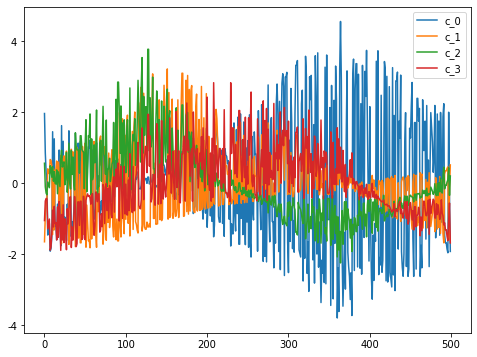

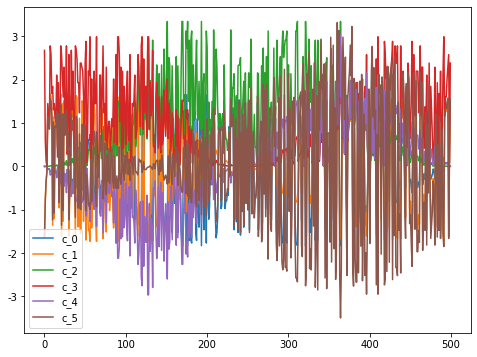

In [10]:
df4 = pd.DataFrame()
df5 = pd.DataFrame()
for i in range(newX.shape[1]):
    df4['c_%d'%i] = newX[:,i]
for i in range(X.shape[1]):
    df5['c_%d'%i] = X[:,i]

plt.figure(figsize=(16,18))
df4.plot()
df5.plot()
plt.show()